# Linear Regression

## Environment

- **Python 2**
> conda create -n siraj-regression python=2
- **pandas, matplotlib, scikit-learn**
> conda install pandas matplotlib scikit-learn


## Resources

- **Pandas** - an extremely popular library for handling data in Python.
> 10 minutes to Pandas (http://pandas.pydata.org/pandas-docs/stable/10min.html#min)
- **Scikit-learn** - a comprehensive library for Machine Learning in Python.
> Scikit-Learn's official tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- **Matplotlib** - a library for plotting and visualizing graphs in Python.
> Matplotlib's official tutorial (http://matplotlib.org/users/pyplot_tutorial.html)

## Tools 

We will use linear regression to predict life expectancy from body mass index (BMI). We will be using scikit-learn's LinearRegression class. This class provides the function fit() to fit the model to our data.

<div class="alert alert-block alert-info"> **from** sklearn.linear_model **import** LinearRegression  
model = LinearRegression()  
model.fit(x_values, y_values)  

</div>


## Example

The data comes from Gapminder (http://www.gapminder.org/)


The life expectancy predicted for a BMI = 21.09731 is [[ 60.31564716]]


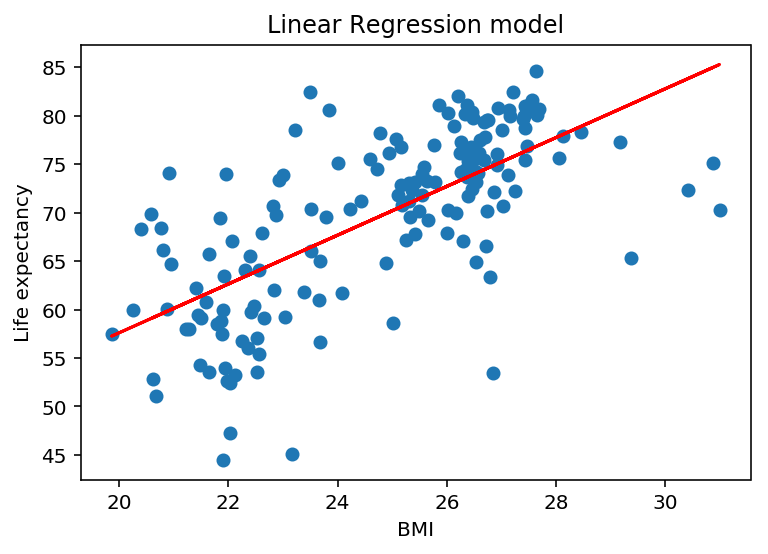

In [13]:
'''
Deep Learning Nanodegree Udacity
Juan M. Gandarias
Linear Regression example
07/08/17
-----------------------------------
Encironment:
conda create -n siraj-regression python=2
conda install pandas matplotlib scikit-learn
'''

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv") 

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model =  LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print('The life expectancy predicted for a BMI = 21.09731 is',laos_life_exp)

# Print the linear regression model
plt.scatter(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])
plt.plot(bmi_life_data[['BMI']], bmi_life_model.predict(bmi_life_data[['BMI']]),'r')
plt.title('Linear Regression model')
plt.xlabel('BMI')
plt.ylabel('Life expectancy')
plt.show()

## Warnings

- Linear Regression works best when the data is linear
- Linear Regression is sensitive to Outliers



# Multiple Linear Regression

In the last section, you saw how we can predict life expectancy using BMI. Here, BMI was the *predictor*, also known as an independent variable. A predictor is a variable you're looking at in order to make predictions about other variables, while the values you are trying to predict are known as dependent variables. In this case, life expectancy was the dependent variable.  

If the outcome you want to predict depends on more than one variable, you can make a more complicated model that takes this into account. As long as they're relevant to the situation, using more independent/predictor variables can help you get a better prediction.  

When there's just one predictor, the linear regression model is a line, but as you add more predictor variables, you're adding more dimensions to the picture.  

When you have one predictor variable, the equation of the line is:  

$$
y = mx + b
$$  

Adding a predictor variable to go to two predictor variables means that the predicting equation is:  

$$
y=m_1x_1+m_2x_2+b
$$  

You can use more than two predictor variables, in fact you should use as many as is useful! If you use n predictor variables, then the model can be represented by the equation  

$$
y=m_1x_1+m_2x_2+m_3x_3+...+m_nx_n+b
$$

## Example

In [17]:
'''
Deep Learning Nanodegree Udacity
Juan M. Gandarias
Multiple Linear Regression example
07/08/17
-----------------------------------
Encironment:
conda create -n siraj-regression python=2
conda install pandas matplotlib scikit-learn
'''

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression() 
model.fit(x,y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction =  model.predict(sample_house)
print('The prediction is', prediction)

The prediction is [ 23.68420569]


# Gradient Descent



After 20 iterations b = 0.027555649319510208, m = 1.4453836473895443, error = 111.5634134597967


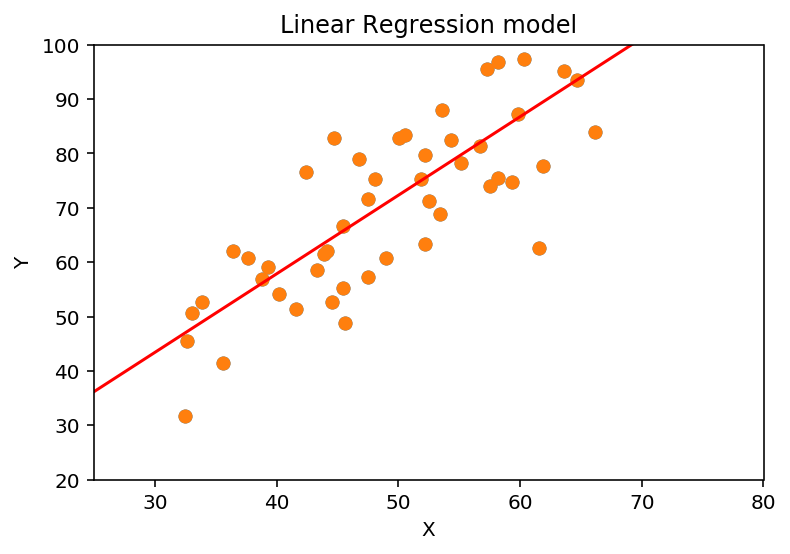

In [7]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def compute_error(b, m, points):
    totalError = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x +b )) **2
    return totalError/N

def step_gradient(b_current, m_current, points, learningRate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current*x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current*x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learningRate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learningRate)
        rows,cols = points.T.shape
        x = np.arange(20, 90, 0.01)
        y = m*x + b
        plt.scatter(points[range(0,cols),0], points[range(0,cols),1])
        plt.plot(x,y,'r')
        plt.title('Linear Regression model')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim([25,80])
        plt.ylim([20,100])
        plt.pause(0.1)
        plt.clf()
    return [b, m]

def run():
    points = genfromtxt('data.csv', delimiter=',')
    #hyoeroarameters
    learning_rate = 0.0001
    #y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 20
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error(b, m, points)))
    rows,cols = points.T.shape
    x = np.arange(20, 90, 0.01)
    y = m*x + b
    plt.scatter(points[range(0,cols),0], points[range(0,cols),1])
    plt.scatter(points[range(0,cols),0], points[range(0,cols),1])
    plt.plot(x,y,'r')
    plt.title('Linear Regression model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim([25,80])
    plt.ylim([20,100])

if __name__ == '__main__':
    run()